## FEATURE ENGINEERING -> HOG FEATURE DESCRIPTOR

HOG -> HISTORGRAM of ORIENTED GRADIENTS

In [2]:
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import cv2
import pickle

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import time

In [4]:
classLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [5]:
# since every value in image is ranging from 0 to 255, need to normalize the data to uniform range of 0-1 , diving by 255
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train1 = X_train.reshape((len(X_train),-1))
print(X_train1.shape)
X_test1 = X_test.reshape((len(X_test),-1))
print(X_test1.shape)

(50000, 3072)
(10000, 3072)


In [8]:
y_train1 = y_train.flatten()
print(y_train1.shape)
y_test1 = y_test.flatten()
print(y_test1.shape)

(50000,)
(10000,)


In [9]:
import random
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

### HOG IMAGE VISUALIZATION

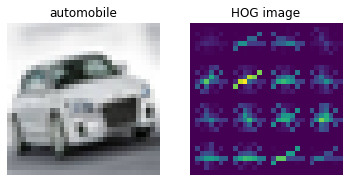

In [19]:
rnd = random.randint(0, 49999)
img = X_train[rnd]
label = y_train[rnd][0]

fd, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True, multichannel = True)
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 6), sharex=True, sharey=True)
ax[0].axis('off')
ax[0].imshow(img)
ax[0].set_title(classLabel[label])
    
ax[1].axis('off')
ax[1].imshow(hog_img)
ax[1].set_title('HOG image')
plt.show()

In [23]:
X_train_hog = []
for i in range(len(X_train)):
    fd , hog_im = hog(X_train[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  multichannel = True)
    X_train_hog.append(fd)

In [25]:
X_train_hog = np.array(X_train_hog)

In [26]:
X_train_hog.shape   # no. of features reduced to 324

(50000, 324)

In [27]:
X_test_hog = []
for i in range(len(X_test)):
    fd , hog_im = hog(X_test[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  multichannel = True)
    X_test_hog.append(fd)

In [28]:
X_test_hog = np.array(X_test_hog)

In [29]:
X_test_hog.shape

(10000, 324)

### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(X_train_hog,y_train1)

In [30]:
with open("SVC_HOG.pkl","rb") as f:
    svc_hog = pickle.load(f)

In [31]:
svc_hog

SVC()

In [34]:
svc_pred = svc_hog.predict(X_test_hog)

In [36]:
acc21 = accuracy_score(svc_pred,y_test1)
print("Accuracy Score :",accuracy_score(svc_pred,y_test1))
print("Confusion Matrix\n",confusion_matrix(svc_pred,y_test1))
print("Classification Report \n",classification_report(svc_pred,y_test1))

Accuracy Score : 0.6443
Confusion Matrix
 [[730  24  85  37  31  22  21  21  97  30]
 [ 18 782  12  25  11   8  20   5  64  69]
 [ 64   9 498  76  69  59  40  46  22  16]
 [ 22  13  72 438  70 157  57  64  11  20]
 [ 32  19 110  84 623  78  47  75  20  20]
 [  9   4  87 171  55 518  50  72   3  19]
 [ 13  22  70  83  55  61 732  12   6  11]
 [  7   5  32  45  58  68  10 665  16  20]
 [ 88  49  23   9  10  11  14   9 708  46]
 [ 17  73  11  32  18  18   9  31  53 749]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.66      0.70      1098
           1       0.78      0.77      0.78      1014
           2       0.50      0.55      0.52       899
           3       0.44      0.47      0.46       924
           4       0.62      0.56      0.59      1108
           5       0.52      0.52      0.52       988
           6       0.73      0.69      0.71      1065
           7       0.67      0.72      0.69       926
           8    

### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_hog,y_train1)

RandomForestClassifier()

In [40]:
with open("rfc_hog.pkl","wb") as f:
    pickle.dump(rfc,f)

In [38]:
rfc_pred = rfc.predict(X_test_hog)

In [39]:
acc22 = accuracy_score(rfc_pred,y_test1)
print("Accuracy Score (Random Forest Classifier):",accuracy_score(rfc_pred,y_test1))
print("Confusion Matrix (Random Forest Classifier)\n",confusion_matrix(rfc_pred,y_test1))
print("Classification Report (Random Forest Classifier)\n",classification_report(rfc_pred,y_test1))

Accuracy Score (Random Forest Classifier): 0.5258
Confusion Matrix (Random Forest Classifier)
 [[606  34  83  40  34  14  21  22  98  37]
 [ 34 695  34  46  39  19  45  21 121 126]
 [ 91   8 362  68  47  71  41  52  26  17]
 [ 24  13  88 271  73 164  41  62  12  23]
 [ 44  24 114  99 474  84  59  76  17  38]
 [ 15   9 125 214  75 424  80 114  11  23]
 [ 19  45 105 135 133 105 669  38  12  26]
 [ 10   8  43  50  78  74  13 545  19  35]
 [128  77  28  23  21  13  12  19 592  55]
 [ 29  87  18  54  26  32  19  51  92 620]]
Classification Report (Random Forest Classifier)
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       989
           1       0.69      0.59      0.64      1180
           2       0.36      0.46      0.41       783
           3       0.27      0.35      0.31       771
           4       0.47      0.46      0.47      1029
           5       0.42      0.39      0.41      1090
           6       0.67      0.52      0.59  

### MULTI-LAYER PERCEPTRON

In [41]:
from sklearn.neural_network import MLPClassifier  
MLP = MLPClassifier(hidden_layer_sizes=(150,100,50),activation="relu",
                    solver="adam",learning_rate="constant",learning_rate_init=0.001,
                    max_iter=500,verbose=True)

nn = MLP.fit(X_train_hog,y_train1)

mlp_pred = MLP.predict(X_test_hog)

Iteration 1, loss = 1.69176458
Iteration 2, loss = 1.40465351
Iteration 3, loss = 1.31789747
Iteration 4, loss = 1.25528912
Iteration 5, loss = 1.21540896
Iteration 6, loss = 1.17768595
Iteration 7, loss = 1.14809633
Iteration 8, loss = 1.12172480
Iteration 9, loss = 1.09962750
Iteration 10, loss = 1.07558034
Iteration 11, loss = 1.05441183
Iteration 12, loss = 1.03255513
Iteration 13, loss = 1.01489622
Iteration 14, loss = 1.00021210
Iteration 15, loss = 0.98324091
Iteration 16, loss = 0.97137755
Iteration 17, loss = 0.95324490
Iteration 18, loss = 0.94037688
Iteration 19, loss = 0.92776327
Iteration 20, loss = 0.91390555
Iteration 21, loss = 0.90101415
Iteration 22, loss = 0.89087504
Iteration 23, loss = 0.88132688
Iteration 24, loss = 0.86965894
Iteration 25, loss = 0.86326329
Iteration 26, loss = 0.85057169
Iteration 27, loss = 0.83643081
Iteration 28, loss = 0.82847483
Iteration 29, loss = 0.82813356
Iteration 30, loss = 0.81096693
Iteration 31, loss = 0.80320545
Iteration 32, los

In [42]:
with open("mlp_hog.pkl","wb") as f:
    pickle.dump(MLP,f)

In [43]:
acc23 = accuracy_score(mlp_pred,y_test1)
print("Accuracy Score (Multi Layer Perceptron):",accuracy_score(mlp_pred,y_test1))
print("Confusion Matrix (Multi Layer Perceptron)\n",confusion_matrix(mlp_pred,y_test1))
print("Classification Report (Multi Layer Perceptron)\n",classification_report(mlp_pred,y_test1))

Accuracy Score (Multi Layer Perceptron): 0.5559
Confusion Matrix (Multi Layer Perceptron)
 [[613  40  79  44  42  27  27  28 103  35]
 [ 36 718  14  28  18  11  24   8  71  87]
 [ 79   7 451  84 106  79  58  44  28  10]
 [ 28  14  64 278  58 161  62  63  14  26]
 [ 50  21 116 122 488  73  56  88  22  31]
 [ 17  11  94 212  79 427  56  95  19  30]
 [ 17  24  77 114  62  83 659  16  11  14]
 [ 15  10  45  52  94  99  24 610  15  37]
 [111  73  44  33  30  21  21  22 651  66]
 [ 34  82  16  33  23  19  13  26  66 664]]
Classification Report (Multi Layer Perceptron)
               precision    recall  f1-score   support

           0       0.61      0.59      0.60      1038
           1       0.72      0.71      0.71      1015
           2       0.45      0.48      0.46       946
           3       0.28      0.36      0.31       768
           4       0.49      0.46      0.47      1067
           5       0.43      0.41      0.42      1040
           6       0.66      0.61      0.63      10

## LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver="sag",multi_class="ovr",verbose=1,n_jobs=-1) # one vs rest (ovr) , n_jobs = -1 (computation across cpu)
model = LR.fit(X_train_hog,y_train1)

lr_pred = LR.predict(X_test_hog)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 32 epochs took 16 seconds
convergence after 35 epochs took 18 seconds
convergence after 35 epochs took 18 seconds
convergence after 36 epochs took 18 seconds
convergence after 31 epochs took 18 seconds
convergence after 35 epochs took 20 seconds


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   20.5s remaining:   13.6s


convergence after 37 epochs took 21 seconds
convergence after 38 epochs took 22 seconds
convergence after 29 epochs took 12 seconds
convergence after 33 epochs took 11 seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.5s finished


In [45]:
with open("logr_hog.pkl","wb") as f:
    pickle.dump(LR,f)

In [46]:
acc24 = accuracy_score(lr_pred,y_test1)
print("Accuracy Score (Logistic Regression):",accuracy_score(lr_pred,y_test1))
print("Confusion matrix (Logistic Regression):\n",confusion_matrix(lr_pred,y_test1))
print("Classification Report (Logistic Regression)\n",classification_report(lr_pred,y_test1))

Accuracy Score (Logistic Regression): 0.5406
Confusion matrix (Logistic Regression):
 [[622  38  76  49  32  16  18  27 120  40]
 [ 34 652  20  43  28  21  36  18  95  95]
 [ 72  15 402  77  41  83  41  65  33  16]
 [ 17  16  69 308  76 143  58  43   9  21]
 [ 44  26 120 102 496  70  72  87  23  23]
 [  9   3 111 155  55 401  60  75   7  21]
 [ 28  54  98 141 111 114 650  32  12  12]
 [ 27  25  52  63  95 102  27 597  22  41]
 [118  80  39  18  33  18  22  13 602  55]
 [ 29  91  13  44  33  32  16  43  77 676]]
Classification Report (Logistic Regression)
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      1038
           1       0.65      0.63      0.64      1042
           2       0.40      0.48      0.44       845
           3       0.31      0.41      0.35       760
           4       0.50      0.47      0.48      1063
           5       0.40      0.45      0.42       897
           6       0.65      0.52      0.58      1252
     

## XGBOOST

In [47]:
import xgboost as xgb
XGB = xgb.XGBClassifier(gamma=0.5, learning_rate=0.1, max_delta_step=0.1, 
                        max_depth=10, min_child_weight=1, n_estimators=100, 
                        nthread=4, objective='multi:logistic', reg_alpha=0.5, 
                        reg_lambda=0.8,subsample=0.8,verbosity=1)
XGB.fit(X_train_hog,y_train1,verbose=1)
xgb_pred = XGB.predict(X_test_hog)

In [48]:
with open("xgb_hog.pkl","wb") as f:
    pickle.dump(XGB,f)

In [49]:
acc25 = accuracy_score(xgb_pred,y_test1)
print("Accuracy Score (XGBoost-HOG):",accuracy_score(xgb_pred,y_test1))
print("Confusion matrix (XGBoost-HOG):\n",confusion_matrix(xgb_pred,y_test1))
print("Classification Report (XGBoost-HOG)\n",classification_report(xgb_pred,y_test1))

Accuracy Score (XGBoost-HOG): 0.4944
Confusion matrix (XGBoost-HOG):
 [[625  43 105  45  45  15  29  39 153  67]
 [ 43 639  32  49  43  23  43  36 113 130]
 [ 92  13 392  92  72  63  45  64  30  30]
 [ 17  12  77 315  88 178  60  70  14  31]
 [ 22  12 116  76 401  70 108  76  15  23]
 [ 12  11 118 189  72 403  93  94   7  32]
 [ 13  52  63 123 108 116 562  47  17  24]
 [ 20  15  49  45 106  98  20 510  22  46]
 [133 110  29  25  30  12  17  23 549  69]
 [ 23  93  19  41  35  22  23  41  80 548]]
Classification Report (XGBoost-HOG)
               precision    recall  f1-score   support

           0       0.62      0.54      0.58      1166
           1       0.64      0.56      0.59      1151
           2       0.39      0.44      0.41       893
           3       0.32      0.37      0.34       862
           4       0.40      0.44      0.42       919
           5       0.40      0.39      0.40      1031
           6       0.56      0.50      0.53      1125
           7       0.51      

In [51]:
models = ["Support Vector\nClassifier","Random Forest\nClassifier","Multi-Layer\nPerceptron","Logistic\nRegression","XG Boost"]
with open("model2.pkl","wb") as f:
    pickle.dump(models,f)

In [ ]:
accuracy = [acc21,acc22,acc23,acc24,acc25]
with open("accuracy_hog.pkl","wb") as f:
    pickle.dump(accuracy,f)